<a href="https://colab.research.google.com/github/EarlyOcean/PCD_Assignment01/blob/main/PCD_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [47]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

!rm -rf PCD_Assignment01
!git clone https://github.com/EarlyOcean/PCD_Assignment01

# all processed images will be displayed with this value
display_width, display_height = 400, 300
def show_image(image):
  resized_image = cv2.resize(image, (display_width, display_height), interpolation=cv2.INTER_NEAREST)
  cv2_imshow(resized_image)

Cloning into 'PCD_Assignment01'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 969.56 KiB | 5.27 MiB/s, done.
Resolving deltas: 100% (5/5), done.


Kode pada notebook ini menggunakan file image yang terdapat pada github, sehingga perlu dimount terlebih dulu sebelum dapat dieksekusi. Fungsi show_image digunakan untuk menampilkan citra hasil downsample/upsample dengan dimensi yang dapat dilihat dengan jelas.

# DownSampling Original Image

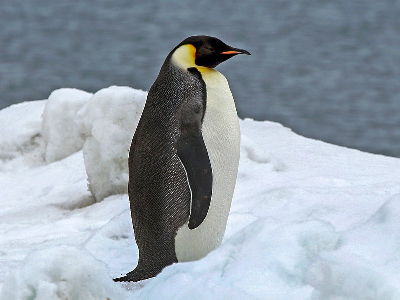

In [48]:
# original image
original_img = cv2.imread("/content/PCD_Assignment01/penguin.jpg")

show_image(original_img)

Citra yang digunakan untuk downsampling adalah foto pingiun seperti terlihat di atas.

# Max DownSampling

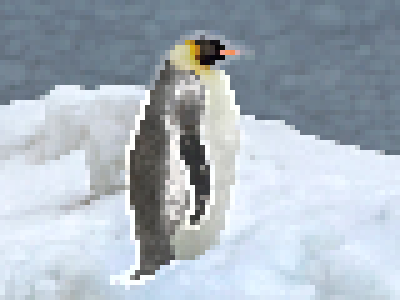

In [49]:
# max downsampled

def max_downsample(image, scaling_factor):
    height, width, channels = image.shape
    downsampled_height = height // scaling_factor
    downsampled_width = width // scaling_factor
    downsampled_image = np.zeros((downsampled_height, downsampled_width, channels), dtype=image.dtype)

    for i in range(downsampled_height):
        for j in range(downsampled_width):
            for c in range(channels):
                block = image[i * scaling_factor:(i + 1) * scaling_factor,
                              j * scaling_factor:(j + 1) * scaling_factor,
                              c]
                downsampled_image[i, j, c] = np.max(block)

    return downsampled_image

img_result = max_downsample(original_img, 10)
show_image(img_result)

Analisis

Pemberlakuan max downsampling menyebabkan citra yang dihasilkan cenderung lebih terang/lebih banyak warna putih. Seperti yang terlihat pada citra di atas, terdapat outline putih yang sebelumnya tidak ada pada pinguin.

# Average Downsampling

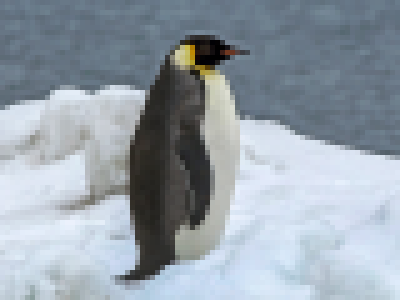

In [50]:
# average downsampled

def average_downsample(image, scaling_factor):
    height, width, channels = image.shape
    downsampled_height = height // scaling_factor
    downsampled_width = width // scaling_factor
    downsampled_image = np.zeros((downsampled_height, downsampled_width, channels), dtype=image.dtype)

    for i in range(downsampled_height):
        for j in range(downsampled_width):
            for c in range(channels):
                block = image[i * scaling_factor:(i + 1) * scaling_factor,
                              j * scaling_factor:(j + 1) * scaling_factor,
                              c]
                downsampled_image[i, j, c] = np.average(block)

    return downsampled_image

img_result = average_downsample(original_img, 10)
show_image(img_result)

Analisis

Average downsampling menghasilkan hasil citra yang secara umum lebih bagus pada kasus ini dibandingkan dengan max downsampling. Karena menggunakan fungsi rata-rata, transisi/outline dari objek pada citra menjadi smooth bila tidak terkesan blur.

# Median DownSampling

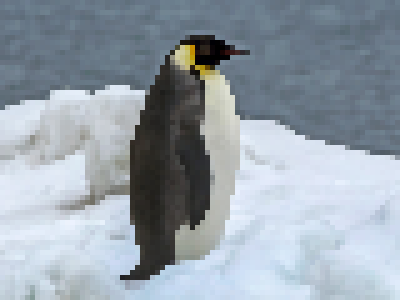

In [51]:
# median downsampled

def median_downsample(image, scaling_factor):
    height, width, channels = image.shape
    downsampled_height = height // scaling_factor
    downsampled_width = width // scaling_factor
    downsampled_image = np.zeros((downsampled_height, downsampled_width, channels), dtype=image.dtype)

    for i in range(downsampled_height):
        for j in range(downsampled_width):
            for c in range(channels):
                block = image[i * scaling_factor:(i + 1) * scaling_factor,
                              j * scaling_factor:(j + 1) * scaling_factor,
                              c]
                downsampled_image[i, j, c] = np.median(block)

    return downsampled_image

img_result = median_downsample(original_img, 10)
show_image(img_result)

Analisis

Citra yang dihasilkan dari proses median downsampling memiliki outline yang lebih tajam, tetapi blocky.

# Upsampling Original Image


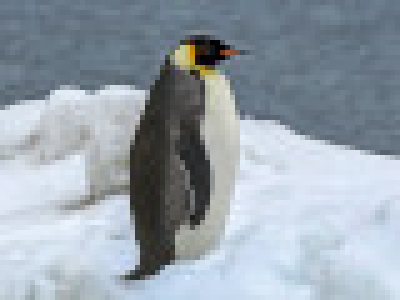

In [40]:
# original image
original_img_blur = cv2.imread("/content/PCD_Assignment01/penguin_blur.jpg")

show_image(original_img_blur)

Citra yang digunakan untuk upsampling adalah foto pingiun sebelumnya yang telah diperkecil hingga 1/10 ukuran semula, sehingga nampak blur.

# Nearest Neighbour UpScaling


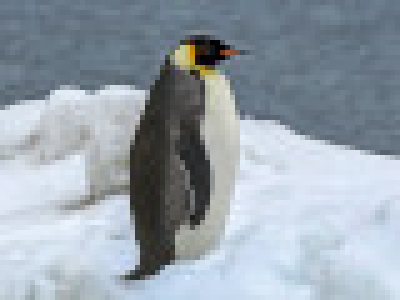

In [52]:
# nearest neighbour upsampled

def nn_upsample(image, scaling_factor):
    height, width, channels = image.shape
    upsampled_height = height * scaling_factor
    upsampled_width = width * scaling_factor
    upsampled_image = np.zeros((upsampled_height, upsampled_width, channels), dtype=image.dtype)

    for i in range(upsampled_height):
        for j in range(upsampled_width):
            original_i = i // scaling_factor
            original_j = j // scaling_factor

            upsampled_image[i, j, :] = image[original_i, original_j, :]

    return upsampled_image

img_result = nn_upsample(original_img_blur, 20)
show_image(img_result)

Analisis

UpScaling dengan metode nearest neighbour cenderung tidak memberikan perubahan besar pada citra, melainkan hanya sekedar memperbesar citra awal. Fungsi custom 'show_image' pada notebook ini juga menggunakan fungsi resize dengan interpolasi nearest neighbour bawaan OpenCV yang digunakan di setiap eksperimen.

# Bilinear UpScaling

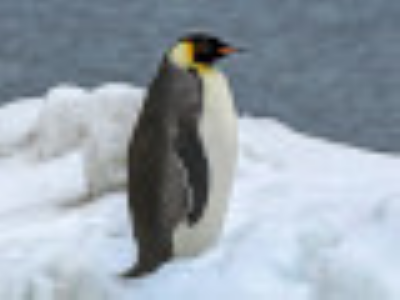

In [53]:
# bilinear upsample

def bilinear_upsample(image, scaling_factor):
    height, width, channels = image.shape
    upsampled_height = height * scaling_factor
    upsampled_width = width * scaling_factor
    upsampled_image = np.zeros((upsampled_height, upsampled_width, channels), dtype=image.dtype)

    for i in range(upsampled_height):
        for j in range(upsampled_width):
            for c in range(channels):
                original_i = i / scaling_factor
                original_j = j / scaling_factor

                # get the 4 neighbouring pixels
                i1 = int(np.floor(original_i))
                i2 = min(int(np.ceil(original_i)), height - 1)
                j1 = int(np.floor(original_j))
                j2 = min(int(np.ceil(original_j)), width - 1)

                q11 = image[i1, j1, c]
                q12 = image[i2, j1, c]
                q21 = image[i1, j2, c]
                q22 = image[i2, j2, c]

                # bilinear operation
                r1 = ((j2 - original_j) / (j2 - j1)) * q11 + ((original_j - j1) / (j2 - j1)) * q21 if (j2 - j1) != 0 else q11
                r2 = ((j2 - original_j) / (j2 - j1)) * q12 + ((original_j - j1) / (j2 - j1)) * q22 if (j2 - j1) != 0 else q12
                interpolated_value = ((i2 - original_i) / (i2 - i1)) * r1 + ((original_i - i1) / (i2 - i1)) * r2 if (i2 - i1) != 0 else r1

                upsampled_image[i, j, c] = interpolated_value

    return upsampled_image

img_result = bilinear_upsample(original_img_blur, 5)
show_image(img_result)

Analisis

Bilinear upscaling menghasilkan citra yang lebih smooth, meskipun masih blur, bila dibandingkan dengan citra blocky yang dihasilkan metode nearest neighbour. Namun, metode ini (setidaknya kode ini) memakan waktu yang lebih signifikan, yaitu 6s di colab bila menggunakan faktor pengali 5, dibandingkan 1s nearest neighbour yang menggunakan faktor pengali 10. Akan tetapi, fungsi bilinear upscaling bawaan dari OpenCV masih lebih optimal dan membutuhkan waktu 0s untuk faktor pengali 10, seperti yang ditunjukkan di bawah.

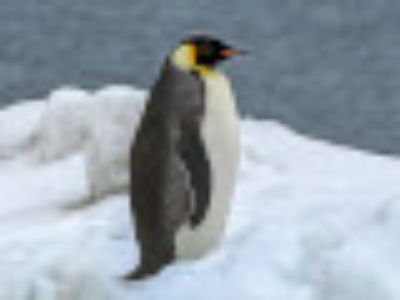

In [54]:
# bilinear upsample using OpenCV library

def bilinear_upsample_cv2(image, scaling_factor):
    height, width, _ = image.shape
    upsampled_width = width * scaling_factor
    upsampled_height = height * scaling_factor

    upsampled_image = cv2.resize(image, (upsampled_width, upsampled_height), interpolation=cv2.INTER_LINEAR)

    return upsampled_image

img_result = bilinear_upsample_cv2(original_img_blur, 10)
show_image(img_result)

# Bicubic UpScaling

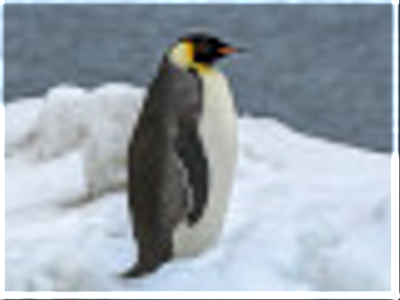

In [55]:
# bicubic upsample

def bicubic_kernel(x): # Catmull-Rom
    abs_x = np.abs(x)

    result = np.where(abs_x <= 1,
                      (1.5 * abs_x - 2.5) * abs_x * abs_x + 1,
                      np.where(abs_x <= 2,
                               (-0.5 * abs_x + 2.5) * abs_x * abs_x - 4 * abs_x + 2,
                               0))
    return result

def bicubic_upsample(image, scaling_factor):
    height, width, channels = image.shape
    upsampled_height = height * scaling_factor
    upsampled_width = width * scaling_factor
    upsampled_image = np.zeros((upsampled_height, upsampled_width, channels), dtype=image.dtype)

    for i in range(upsampled_height):
        for j in range(upsampled_width):
            for c in range(channels):
                original_i = i / scaling_factor
                original_j = j / scaling_factor

                # get the 1st and 2nd ring
                i_indices = np.arange(int(np.floor(original_i)) - 1, int(np.floor(original_i)) + 3)
                j_indices = np.arange(int(np.floor(original_j)) - 1, int(np.floor(original_j)) + 3)

                i_indices = np.clip(i_indices, 0, height - 1)
                j_indices = np.clip(j_indices, 0, width - 1)

                # calculate weights
                weights_i = bicubic_kernel(original_i - i_indices)
                weights_j = bicubic_kernel(original_j - j_indices)

                # perform weighted sum
                interpolated_value = 0
                for row in range(4):
                    for col in range(4):
                        interpolated_value += image[i_indices[row], j_indices[col], c] * weights_i[row] * weights_j[col]

                # assign interpolated value
                upsampled_image[i, j, c] = np.clip(interpolated_value, 0, 255)

    return upsampled_image

img_result = bicubic_upsample(original_img_blur, 5)
show_image(img_result)

Analisis

Di sini, upscaling dengan metode bicubic memakan waktu yang lebih signifikan yaitu 34s untuk faktor pengali 5, meskipun fungsi bawaan dari OpenCV masih hanya membutuhkan 0s. Hal lain yang terlihat dari hasil yang didapatkan adalah terdapat bingkai putih di sekeliling citra, yang disebabkan oleh proses interpolasi yang tidak sempurna di batas luar citra. Namun, efek ini sudah diatasi dengan optimal oleh fungsi-fungsi bawaan library.

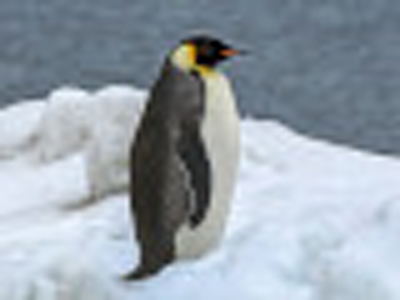

In [56]:
# bicubic upsample using OpenCV library

def bicubic_upsample_cv2(image, block_size):
    height, width, _ = image.shape
    upsampled_width = width * block_size
    upsampled_height = height * block_size

    upsampled_image = cv2.resize(image, (upsampled_width, upsampled_height), interpolation=cv2.INTER_CUBIC)

    return upsampled_image

img_result = bicubic_upsample_cv2(original_img_blur, 10)
show_image(img_result)

# Conclussion

Setiap metode pada proses downsampling maupun upsampling memiliki kelebihan dan kekurangannya masing-masing. Tiap-tiap metode juga dapat digunakan secara situasional, tergantung pada citra apa yang ingin diproses atau hasil seperti apa yang diinginkan. Pada kasus citra pinguin, citra downsampled terbaik dihasilkan oleh average downsampling, meskipun median downsampling juga mendekati. Citra upscaled terbaik dihasilkan oleh bilinear dan bicubic (bawaan), meskipun memakan waktu yang lebih lama.